# Red Wine Quality Predicition



## importing libaries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score


from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

### EDA

In [24]:
data=pd.read_csv("winequality-red.csv")

In [25]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [26]:
print(data.shape)
print(data.isnull().values.any())

(1599, 12)
False


## Data Statictics

In [27]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## DATA VISUALIZATION

### Distribution of Quality

Text(0.5, 1.0, 'White Wines')

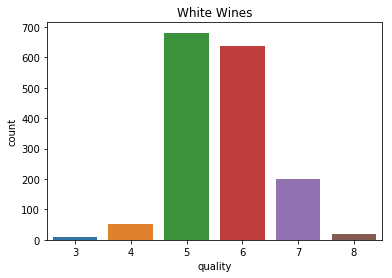

In [29]:
sns.countplot(data=data, x="quality")
plt.title("White Wines")

In [30]:
data.quality.describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

#### Sulphates and Quality

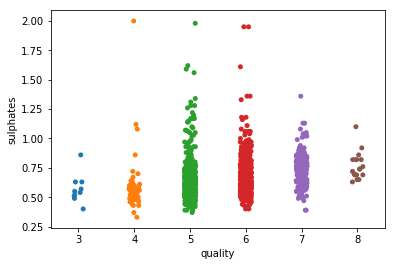

In [31]:
sns.stripplot(data=data, x="quality", y="sulphates", jitter=True, split=True)

### ACID


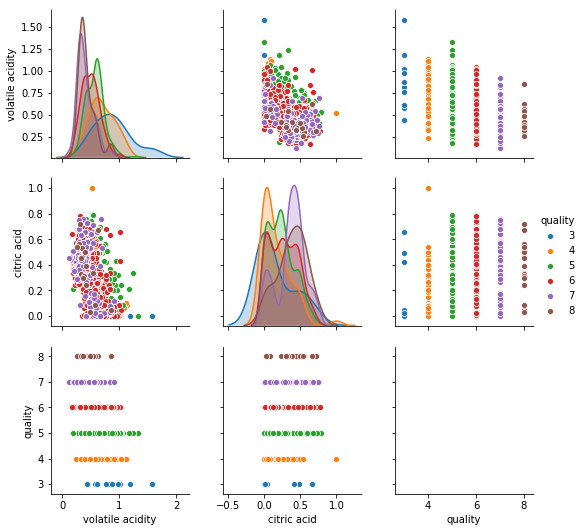

In [32]:
sns.pairplot(data[["volatile acidity", "citric acid", "quality"]], hue="quality")

### Best vs Worst

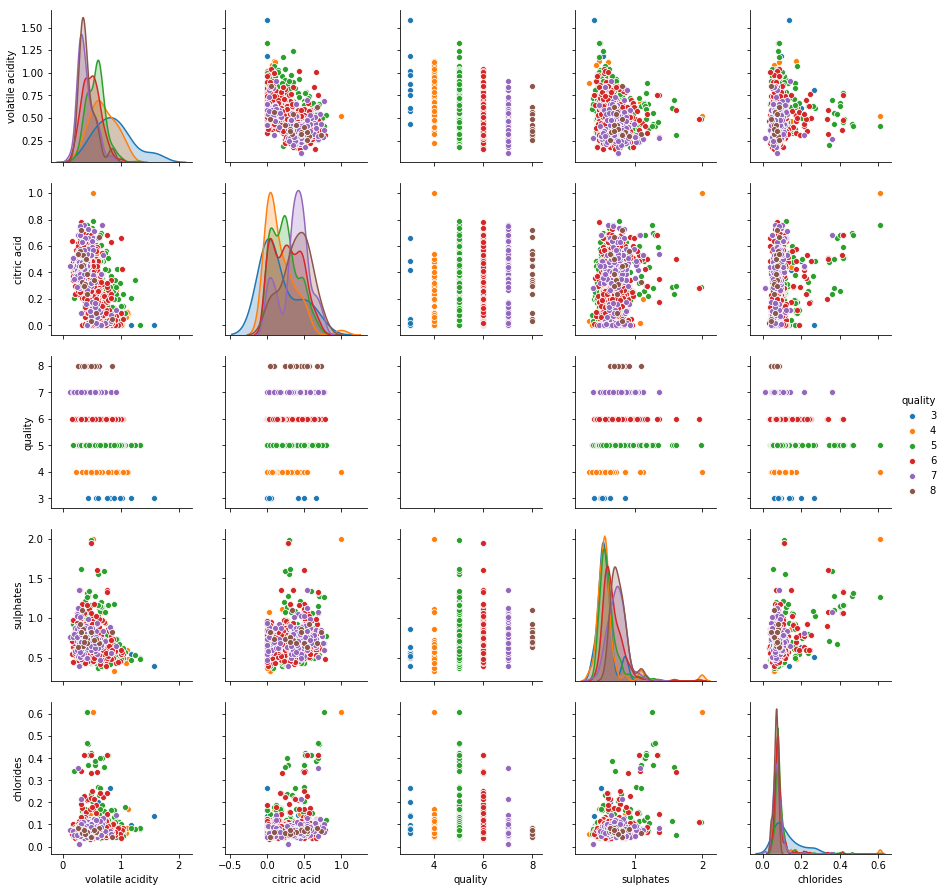

In [33]:
sns.pairplot(data[["volatile acidity", "citric acid", "quality", "sulphates", "chlorides"]], hue="quality")

In [34]:
data.apply(lambda x: len(x.unique()))

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


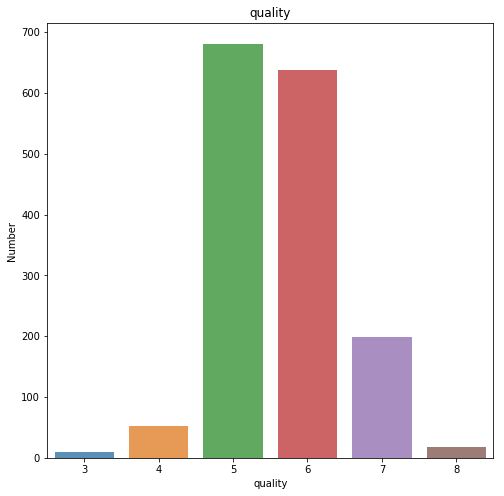

In [35]:
quality=data['quality'].value_counts()
print(quality)
plt.figure(figsize=(8,8))
sns.barplot(quality.index, quality.values, alpha=0.8)
plt.title('quality')
plt.ylabel('Number')
plt.xlabel('quality')
plt.show()

In [36]:
print('Original Categories:')
print(data['quality'].value_counts())

print( '\nModified Categories:')
data['quality'] = data['quality'].replace({3:'Not Good',
                                           4:'Not Good',
                                           5:'Not Good',
                                           6:'Not Good',
                                           7:'Good',
                                           8:'Good'})
print(data['quality'].value_counts())

Original Categories:
5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Modified Categories:
Not Good    1382
Good         217
Name: quality, dtype: int64


In [37]:
data['quality']=data['quality'].map({'Not Good':0,'Good':1})

In [38]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


### Train and Test Split(80:20)

In [39]:
y=data['quality']
data.drop(['quality'],axis=1,inplace=True)

In [40]:
train,test,y_train,y_test=train_test_split(data,y,test_size=0.2,shuffle=True)

In [41]:
print(train.shape,test.shape,y_train.shape,y_test.shape)

(1279, 11) (320, 11) (1279,) (320,)


In [42]:
from collections import Counter
print(Counter(y_train).keys())
print(Counter(y_train).values())

dict_keys([1, 0])
dict_values([167, 1112])


In [43]:
from collections import Counter
print(Counter(y_test).keys())
print(Counter(y_test).values())

dict_keys([0, 1])
dict_values([270, 50])


## Support Vector Machine RBF Kernel

### Hypermeter Turning

Best HyperParameter:  {'C': 100, 'gamma': 0.5}
0.8798817451438442


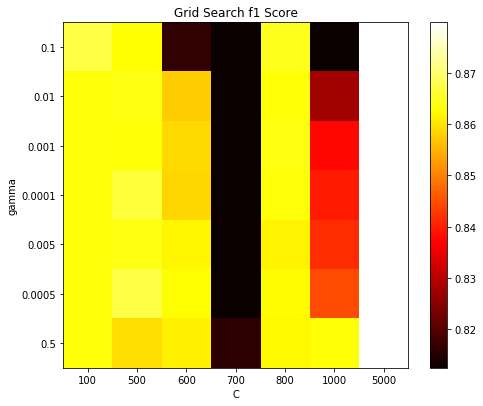

In [46]:
C=[100,500,600,700,800,1000,5000]
gamma=[0.1,0.01,0.001, 0.0001,0.005,0.0005,0.5]
tuned_parameters = [{'C':C,'gamma':gamma}]
sv = SVC(kernel='rbf')
gsv = GridSearchCV(sv, tuned_parameters, scoring = 'f1_weighted', cv=5)
gsv.fit(train,y_train)
print("Best HyperParameter: ",gsv.best_params_)
print(gsv.best_score_)

scores = gsv.cv_results_['mean_test_score'].reshape(len(C),len(gamma))

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('C')
plt.ylabel('gamma')
plt.colorbar()
plt.xticks(np.arange(len(C)), C)
plt.yticks(np.arange(len(gamma)), gamma)
plt.title('Grid Search f1 Score')
plt.show()

### SVM using optimal C and Gamma

Accuracy on test set: 87.188%
Precision on test set: 0.714
Recall on test set: 0.300
F1-Score on test set: 0.423


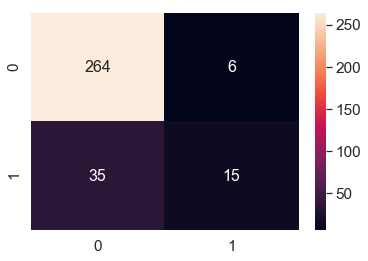

In [47]:
SV= SVC(kernel='rbf',C=100,gamma=0.5)
SV.fit(train,y_train)
y_pred =SV.predict(test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred)))
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred)))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred)))
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

##  Random Forest

### Hypermeter Turning

Fitting 5 folds for each of 272 candidates, totalling 1360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 1337 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 1360 out of 1360 | elapsed:   15.1s finished


Best HyperParameter:  {'max_depth': 20, 'n_estimators': 15}
0.8992024267019971


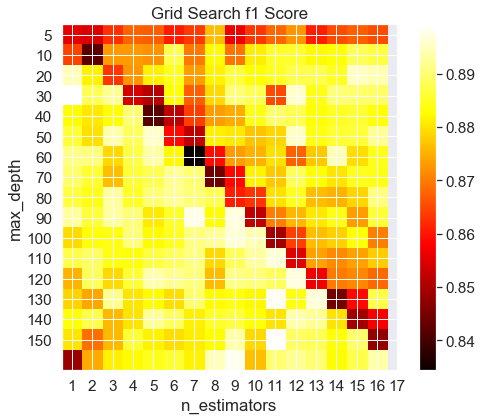

In [48]:
nEstimator = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
depth = [5,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150]

RF = RandomForestClassifier()
hyperParam = [{'n_estimators':nEstimator,'max_depth': depth}]
gsv = GridSearchCV(RF,hyperParam,cv=5,verbose=1,scoring='f1_weighted',n_jobs=-1)
gsv.fit(train,y_train)
print("Best HyperParameter: ",gsv.best_params_)
print(gsv.best_score_)
scores = gsv.cv_results_['mean_test_score'].reshape(len(nEstimator),len(depth))

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.colorbar()
plt.xticks(np.arange(len(nEstimator)), nEstimator)
plt.yticks(np.arange(len(depth)), depth)
plt.title('Grid Search f1 Score')
plt.show()

### RandomForest using optimal n_estimators & max_depth

Accuracy on test set: 91.250%
Precision on test set: 0.917
Recall on test set: 0.736
F1-Score on test set: 0.791


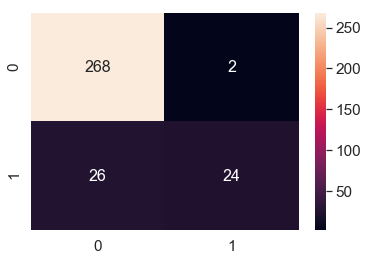

In [49]:
RF= RandomForestClassifier(n_estimators=12,max_depth=110)
RF.fit(train,y_train)
y_pred =RF.predict(test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred,average='macro')))
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred,average='macro')))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred,average='macro')))
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

### Final Conclusion

|MODELS|Accuracy|F1Score|
|------|--------|-------|
|SVM|88.438%|0.448|
|RF|91.250%|0.796|